# A310 - Lab 03 - Liam Deel

### Chapter 1 - Exploratory Data Analysis

In [3]:
# import necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load in the bike sharing csv file
hour = pd.read_csv('hour.csv')

# display the first 5 rows of the data
print(hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  count  
0           1  0.24  0.2879  0.81        0.0       3          13     16  
1           1  0.22  0.2727  0.80        0.0       8          32     40  
2           1  0.22  0.2727  0.80        0.0       5          27     32  
3           1  0.24  0.2879  0.75        0.0       3          10     13  
4           1  0.24  0.2879  0.75        0.0       0           1      1  


### State the Problem

**Business Problem Statement:**

As the newly appointed CEO of a bike-sharing company in Washington, DC, I need to understand our company's performance to make strategic business decisions. The key questions I need to answer are:

1. What are our current ridership patterns across different times and seasons?
2. What factors influence our customer usage (weather, time of day, day of week)?
3. How do casual users differ from registered users in their behavior?
4. What opportunities exist to increase revenue and customer satisfaction?

### Display Data and Calculate Summary Stats

In [4]:
# display basic information about the dataset
print('Dataset Shape:', hour.shape)
print('\nColumn Names and Types:')
print(hour.dtypes)
print('\nFirst 10 Rows of Data:')
print(hour.head(10))

Dataset Shape: (17379, 17)

Column Names and Types:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

First 10 Rows of Data:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   
5        6  2011-01-01       1   0     1   5        0        6      

In [5]:
# calculate mean rideship
mean_count = hour['count'].mean()
print(f'Mean Hourly Rideship: {mean_count:.2f}')

# calculate median
median_count = hour['count'].median()
print(f'Median Hourly Rideship: {median_count:.2f}')

# calculate standard deviation
std_count = hour['count'].std()
print(f'Standard Deviation of Hourly Rideship: {std_count:.2f}')

# calculate min and max for registered users
min_registered = hour['registered'].min()
max_registered = hour['registered'].max()
print(f'Minimum Registered Users: {min_registered}')
print(f'Maximum Registered Users: {max_registered}')


Mean Hourly Rideship: 189.46
Median Hourly Rideship: 142.00
Standard Deviation of Hourly Rideship: 181.39
Minimum Registered Users: 0
Maximum Registered Users: 886


In [6]:
# use describe() function to get comprehensive summary of the statistics
print('Summary Statistics:')
print(hour.describe())

Summary Statistics:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431  

### Summary of the Above Cell

**Summary of Data Display and Summary Statistics:**

I've loaded and examined the bike-sharing dataset containing 17,379 hourly observations from 2011-2012. The summary statistics reveal an average hourly ridership of ~189 users with high variability (std ~181), indicating significant fluctuations between low-demand hours (25th percentile: 40 users) and peak hours (max: 977 users). Registered users consistently outnumber casual users and range from 0 to 886 per hour, suggesting strong user retention but potential barriers for casual riders. These baseline metrics provide a foundation for understanding business performance and identifying growth opportunities.


### Analyze Nighttime and Seasonal Data

In [8]:
# analyze nighttime data (hours 0-4: midnight to 4 am)
nighttime_mean = hour.loc[hour['hr'] < 5, 'registered'].mean()
print(f'Average Registered Users during Nighttime (12am - 4am): {nighttime_mean:.2f}')

# compare cold vs warm early mornings
cold_night_mean = hour.loc[(hour['hr'] < 5) & (hour['temp'] < 0.50), 'count'].mean()
warm_night_mean = hour.loc[(hour['hr'] < 5) & (hour['temp'] > 0.50), 'count'].mean()

print(f"\nAverage ridership on cold early mornings (temp < 0.50): {cold_night_mean:.2f}")
print(f"Average ridership on warm early mornings (temp > 0.50): {warm_night_mean:.2f}")
print(f"Difference: {warm_night_mean - cold_night_mean:.2f} more riders on warm nights")

Average Registered Users during Nighttime (12am - 4am): 20.79

Average ridership on cold early mornings (temp < 0.50): 19.52
Average ridership on warm early mornings (temp > 0.50): 33.64
Difference: 14.12 more riders on warm nights


In [12]:
# analyze seasonal patterns
# season: 1 = winter, 2 = spring, 3 = summer, 4 = fall
seasonal_means = hour.groupby(['season'])['count'].mean()
print('Average Rideship by Season:')
print(seasonal_means)
print('\nSeason Labels: 1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall')

Average Rideship by Season:
season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64

Season Labels: 1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall


In [13]:
# analyze seasonal patterns broken down by holidays vs non-holidaus
seasonal_holiday_means = hour.groupby(['season', 'holiday'])['count'].mean()
print('Average Rideship by Season and Holiday:')
print(seasonal_holiday_means)
print('\nHoliday: 0 = No, 1 = Yes')

Average Rideship by Season and Holiday:
season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64

Holiday: 0 = No, 1 = Yes


### Summary of Seasonal & Nighttime Data

**Summmary of Nighttime & Seasonal Analysis**

The analysis reveals significant temporal patterns in ridership. Nighttime hours (midnight-4am) show minimal demand, with warm nights slightly outperforming cold nights, suggesting potential for nighttime discount promotions. Seasonal analysis shows dramatic variation: summer peaks at ~236 riders/hour while winter drops to ~111 riders/hour, with holidays showing lower ridership in colder months (indicating commuter-driven demand) but similar ridership in warmer months (suggesting recreational users). These patterns indicate opportunities for seasonal pricing strategies, targeted marketing campaigns differentiated by season and user type, and dynamic fleet management to optimize capital allocation throughout the year.

### Visualize Data Using Matplotlib

#### **Plot 1: Simple Scatterplot - All Data**

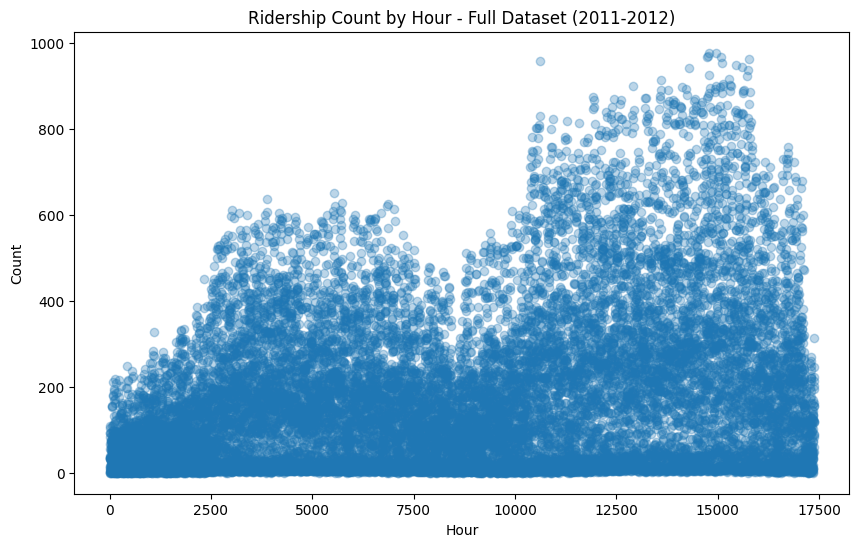

In [21]:
# create a simple scatterplot showing all ridership over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=hour['instant'], y=hour['count'], alpha=0.3)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour - Full Dataset (2011-2012)")
plt.show()

#### **Plot 2: Scatterplot - First 48 Hours**

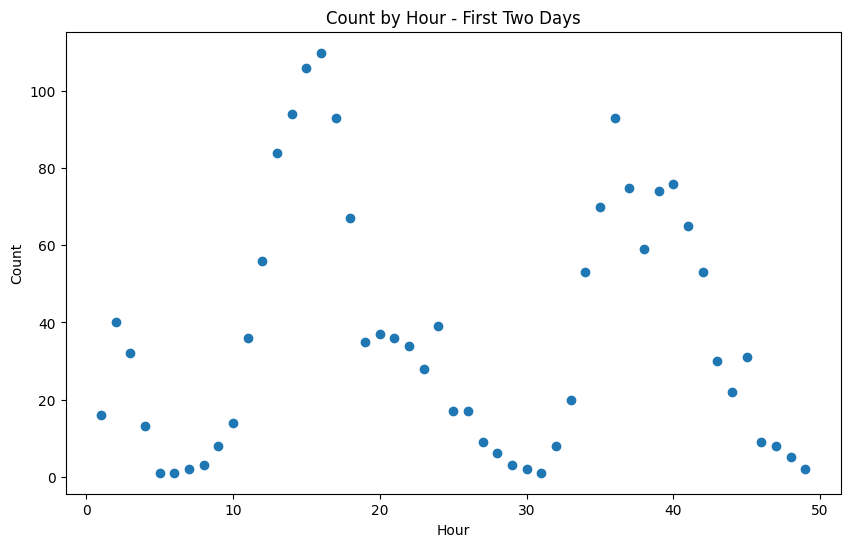

In [15]:
# subset data to first 48 hours (approximately first 2 days)
hour_first48 = hour.loc[0:48, :]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=hour_first48['instant'], y=hour_first48['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

#### **Plot 3: Styled Scatterplot with Different Markers**

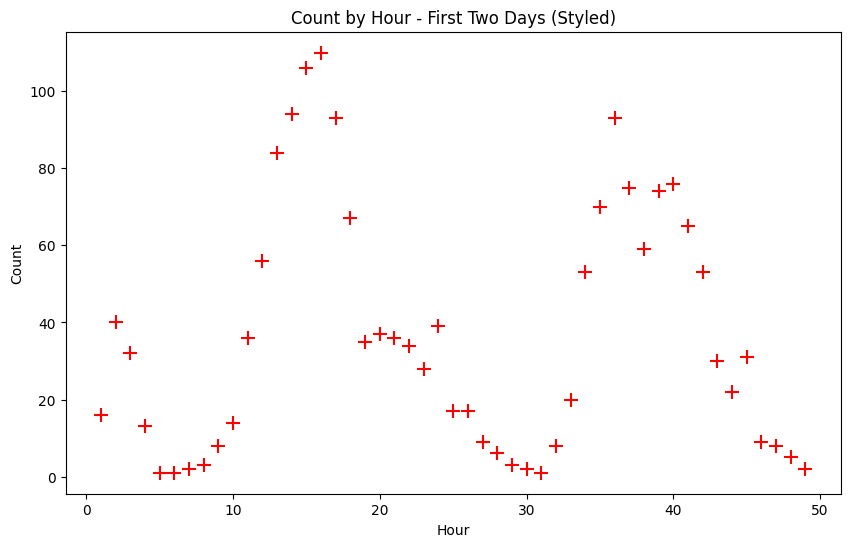

In [20]:
# create scatterplot with custom styling
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=hour_first48['instant'], y=hour_first48['count'],
           c='red', marker='+', s=100)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days (Styled)")
plt.show()

#### **Plot 4: Line Plot - Casual vs Registed Users**

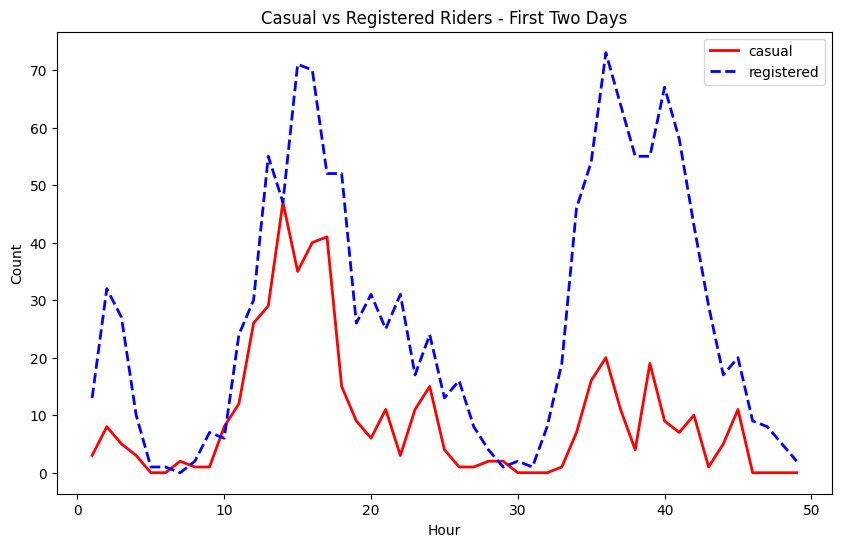

In [19]:
# line plot comparing casual and registered riders
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hour_first48['instant'], hour_first48['casual'],
        c='red', label='casual', linestyle='-', linewidth=2)
ax.plot(hour_first48['instant'], hour_first48['registered'],
        c='blue', label='registered', linestyle='--', linewidth=2)
ax.legend()
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Casual vs Registered Riders - First Two Days")
plt.show()

#### **Plot 5: Box Plots - Rideship by Hour of Day**

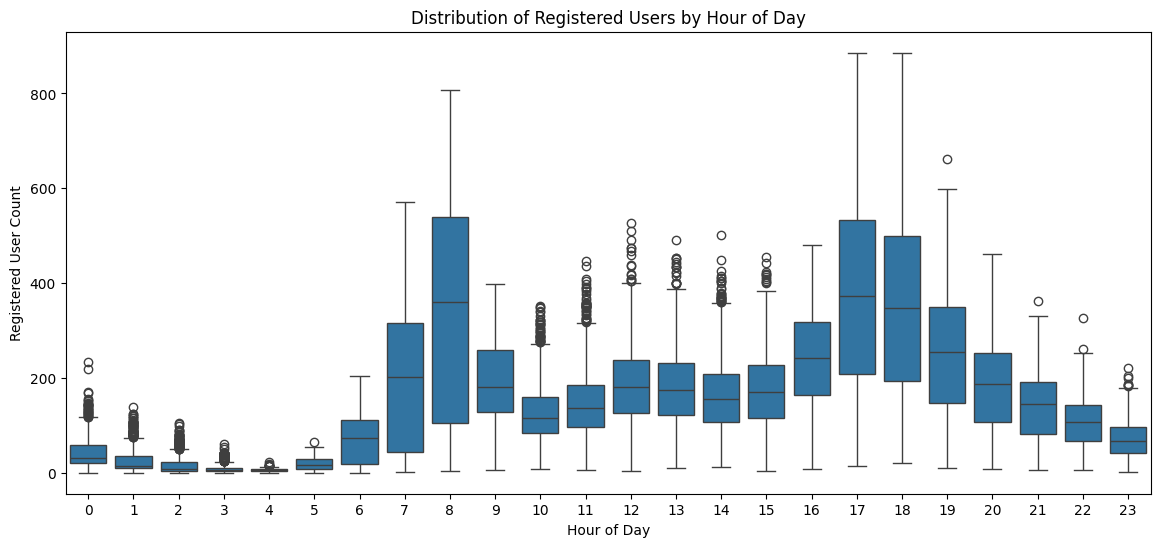

In [22]:
# box plots showing distribution of ridership for each hour of the day
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x='hr', y='registered', data=hour)
plt.xlabel("Hour of Day")
plt.ylabel("Registered User Count")
plt.title("Distribution of Registered Users by Hour of Day")
plt.show()

#### **Plot 6: Histogram - Distribution of Rideship Counts**

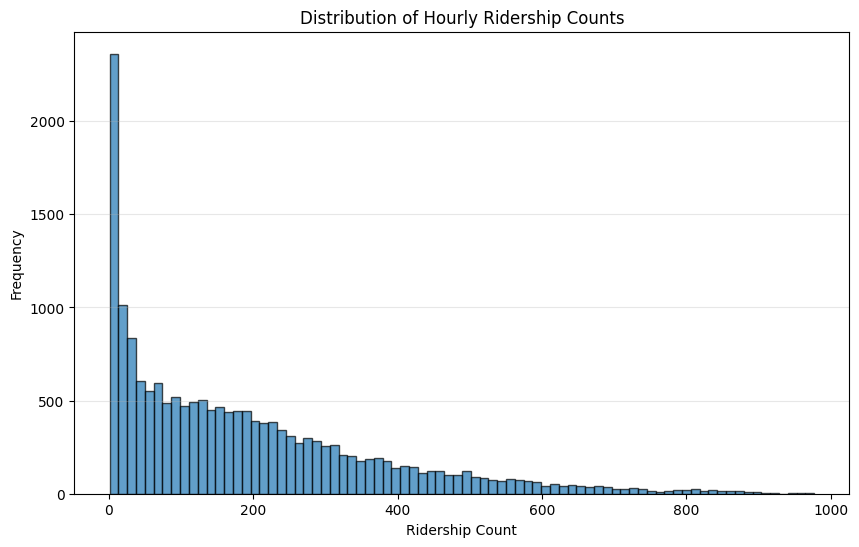

In [23]:
# histogram showing frequency distribution of ridership counts
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(hour['count'], bins=80, edgecolor='black', alpha=0.7)
plt.xlabel("Ridership Count")
plt.ylabel("Frequency")
plt.title("Distribution of Hourly Ridership Counts")
plt.grid(axis='y', alpha=0.3)
plt.show()

#### **Plot 7: Pair Plot - Relationships Among Variables**

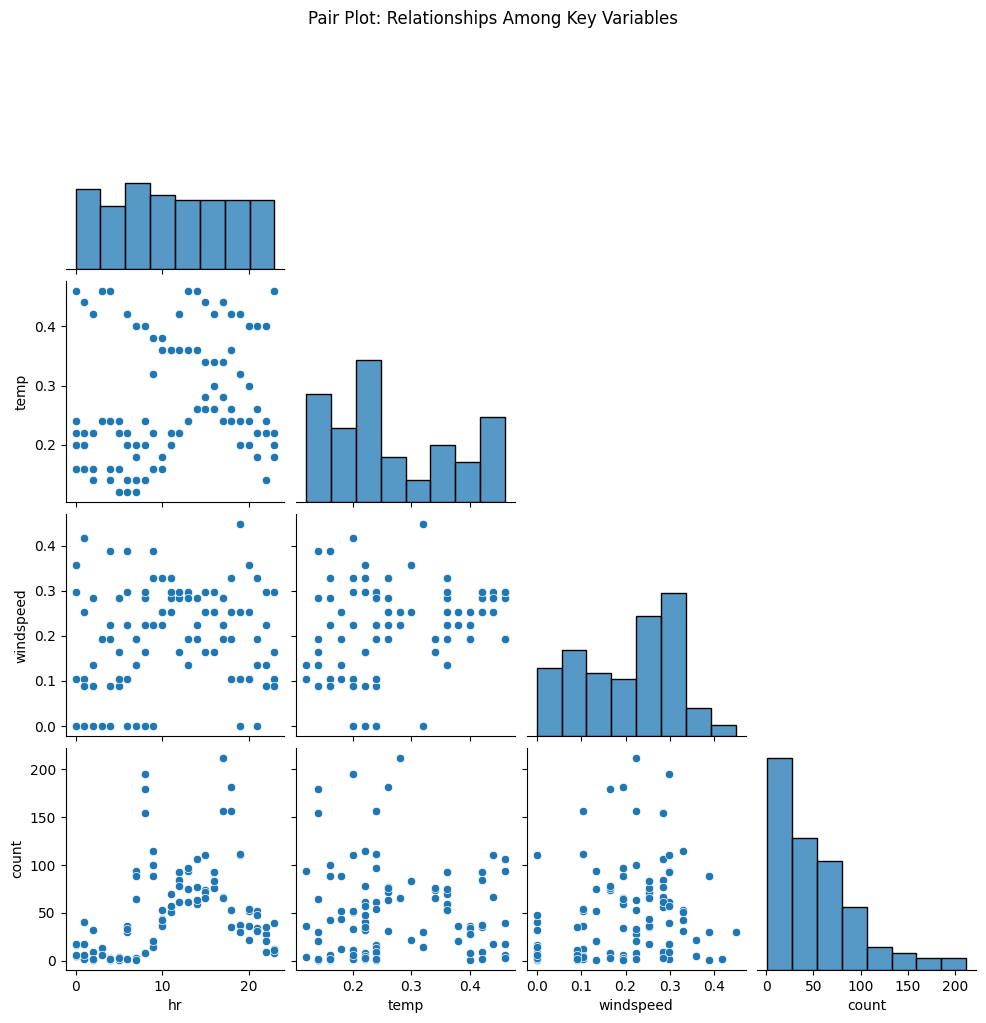

In [24]:
# pair plot showing relationships between selected variables
# using a subset of data for clearer visualization
thevariables = ['hr', 'temp', 'windspeed', 'count']
hour_first100 = hour.loc[0:100, thevariables]
sns.pairplot(hour_first100, corner=True)
plt.suptitle("Pair Plot: Relationships Among Key Variables", y=1.02)
plt.show()

#### **Plot 8: Heat Map - Rideship by Hour and Day of Week**

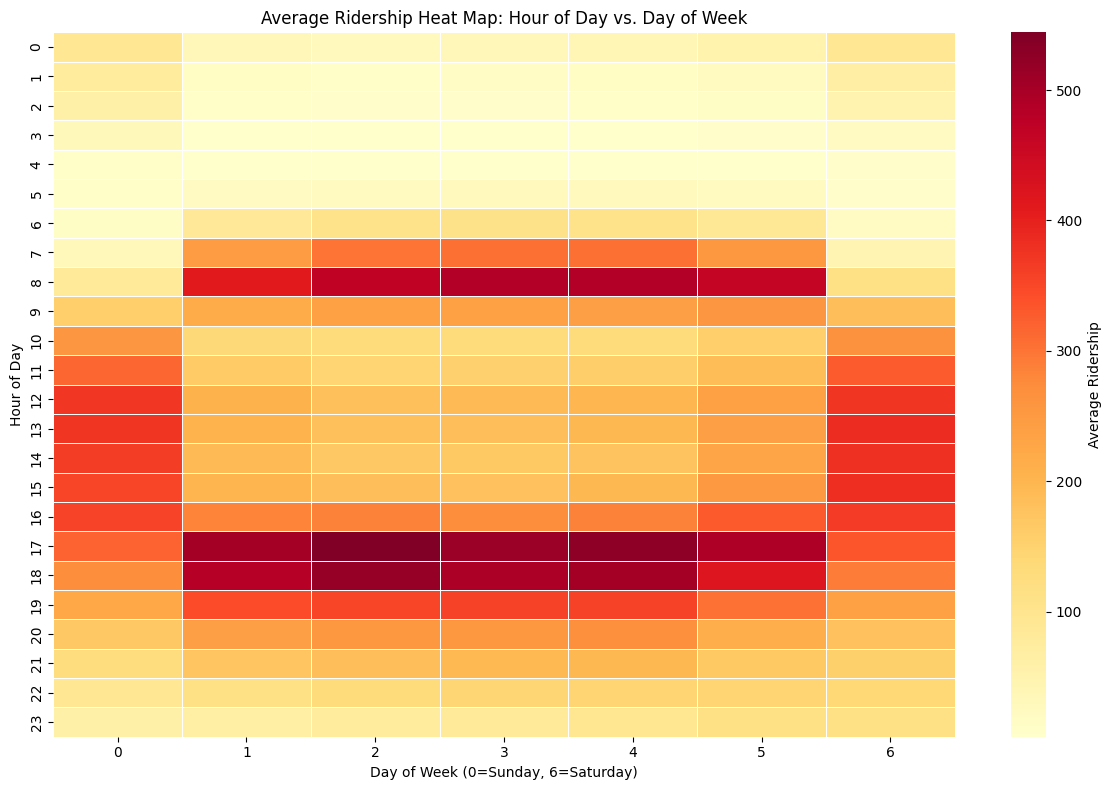

In [26]:
# create pivot table for heat map
df_hm = hour.pivot_table(index='hr', columns='weekday', values='count')

# draw heat map
plt.figure(figsize=(12, 8))
sns.heatmap(df_hm, fmt=".0f", cmap='YlOrRd', linewidths=0.5,
            cbar_kws={'label': 'Average Ridership'})
plt.xlabel("Day of Week (0=Sunday, 6=Saturday)")
plt.ylabel("Hour of Day")
plt.title("Average Ridership Heat Map: Hour of Day vs. Day of Week")
plt.tight_layout()
plt.show()

## Reflection About Each Visualization

**Interpretation of Visualizations:**

**Plot 1 - Full Dataset Scatterplot:**
- Shows clear seasonal patterns with ridership increasing from winter to summer
- Visible overall growth trend across the two years
- High variability in daily ridership patterns

**Plot 2 & 3 - First 48 Hours:**
- Demonstrates daily cyclical patterns even in the first two days
- Night hours have minimal ridership, daytime shows peaks
- Custom styling (red + markers) makes individual observations clearer

**Plot 4 - Casual vs. Registered Line Plot:**
- **Key Finding**: Registered users consistently outnumber casual users
- Both groups show similar daily patterns but different magnitudes
- Registered users dominate even at night, suggesting committed commuters
- Casual users peak in afternoon, suggesting recreational/tourist use

**Plot 5 - Box Plots by Hour:**
- **Rush hour patterns clearly visible**: Two major peaks around 8 AM and 5-6 PM
- These correspond to typical commute times
- Nighttime hours (0-5 AM) have very low medians and small IQR
- Many outliers during peak hours indicate occasional very high demand
- **Business implication**: This is primarily a commuter service

**Plot 6 - Ridership Histogram:**
- Right-skewed distribution: many hours with low ridership, few with very high
- Most hours have 50-300 riders
- Very few hours exceed 700 riders
- **Capacity planning insight**: With 800 bikes, we'd rarely be at capacity, suggesting potential to reduce fleet size

**Plot 7 - Pair Plot:**
- Weak to no correlation between hr/temp/windspeed in this small sample
- Count shows some relationship with time of day
- Temperature appears relatively normally distributed
- This visualization is more useful with larger samples and more variables

**Plot 8 - Heat Map (Hour × Day of Week):**
- **Most Important Visualization for Business Strategy**
- **Weekday pattern**: Dark bands at 8 AM and 5-6 PM confirm commuter behavior
- **Weekend pattern**: More gradual increase through afternoon (11 AM - 5 PM)
- Weekends peak later and have more sustained afternoon demand
- **Marketing opportunity**: Target weekend recreational users differently than weekday commuters
- **Pricing opportunity**: Implement surge pricing during weekday rush hours (8 AM, 5-6 PM)
- **Staffing opportunity**: Ensure bike redistribution during off-peak hours between rush periods

## Calculate Correlations & Create a Heat Map




In [4]:
# calculate individual correlations
casual_registered_corr = hour['casual'].corr(hour['registered'])
temp_hum_corr = hour['temp'].corr(hour['hum'])

print(f'Correlation between casual and registered users: {casual_registered_corr:.4f}')
print(f'Correlation between temperature and humidity: {temp_hum_corr:.4f}')

Correlation between casual and registered users: 0.5066
Correlation between temperature and humidity: -0.0699


In [5]:
# calculate temp and count correlation
temp_count_corr = hour['temp'].corr(hour['count'])
print(f'Correlation between temperature and total rideship: {temp_count_corr:.4f}')

# calculate windspeed and count correlation
wind_count_corr = hour['windspeed'].corr(hour['count'])
print(f'Correlation between windspeed and total rideship: {wind_count_corr:.4f}')

Correlation between temperature and total rideship: 0.4048
Correlation between windspeed and total rideship: 0.0932


In [6]:
# create correlation matricc for selected variables
correlation_vars = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'count']
cor_matrix = hour[correlation_vars].corr()
print('Correlation Matric: ')
print(cor_matrix)

Correlation Matric: 
                temp       hum  windspeed    casual  registered     count
temp        1.000000 -0.069881  -0.023125  0.459616    0.335361  0.404772
hum        -0.069881  1.000000  -0.290105 -0.347028   -0.273933 -0.322911
windspeed  -0.023125 -0.290105   1.000000  0.090287    0.082321  0.093234
casual      0.459616 -0.347028   0.090287  1.000000    0.506618  0.694564
registered  0.335361 -0.273933   0.082321  0.506618    1.000000  0.972151
count       0.404772 -0.322911   0.093234  0.694564    0.972151  1.000000


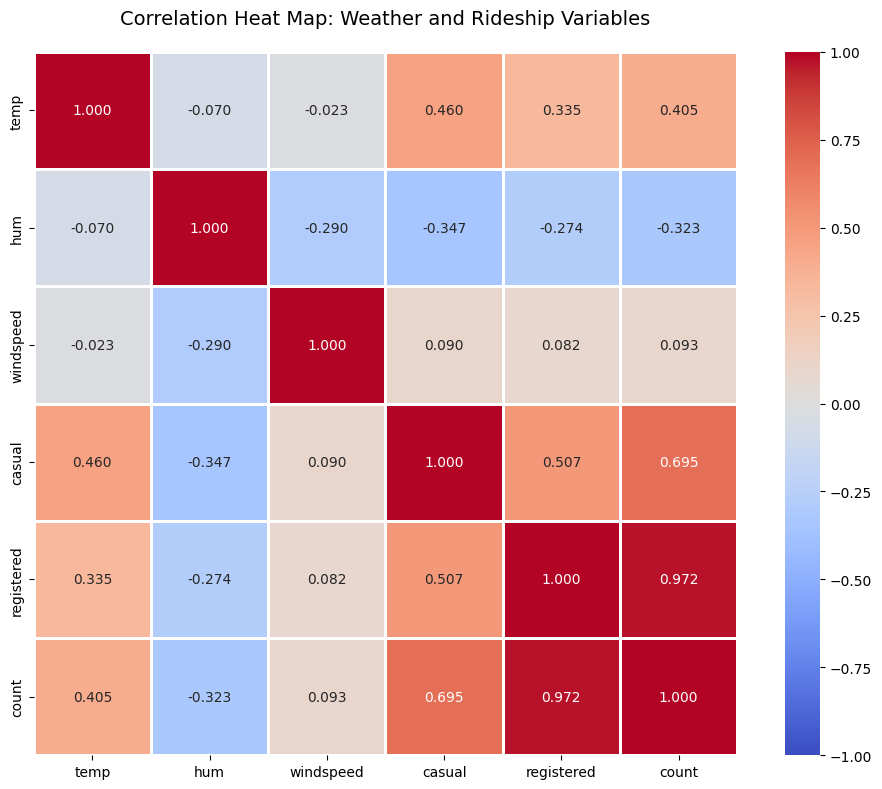

In [7]:
# create heat map of correlation matrix
plt.figure(figsize = (10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt = '.3f',
            xticklabels = correlation_vars,
            yticklabels = correlation_vars,
            center = 0, vmin =-1, vmax = 1,
            square = True, linewidths = 1)
plt.title('Correlation Heat Map: Weather and Rideship Variables', fontsize = 14, pad = 20)
plt.tight_layout()
plt.show()

## Summarization of the Heat Map
**Correlation Analysis and Heat Map Interpretation**

The correlation matrix and heat map reveal several key relationships in our data. Temperature shows a moderate positive correlation with total ridership (r ≈ 0.40), meaning warmer weather drives more riders, while humidity has a weak negative effect (r ≈ -0.32). Registered users dominate total ridership (r ≈ 0.97), confirming they are the core of our business, while casual and registered users show a moderate positive correlation with each other (r ≈ 0.51), suggesting both groups respond similarly to external conditions like weather. These findings support implementing weather-based dynamic pricing and prioritizing registered user retention as core business strategies.

**Important Statistical Note**:
Correlation does not imply causation. While temperature correlates with ridership, it doesn't necessarily cause it directly - both might be influenced by season, holidays, or other factors. We should be cautious about making causal claims based on correlation alone.

## Describe in a paragraph what you learned (or enjoyed learning) from this chapter

This chapter demonstrated that powerful business insights don't require complex machine learning;
they require curiosity and the right questions. Through exploratory data analysis of the
bike-sharing dataset, I learned how summary statistics, subsetting, and thoughtful visualization
can reveal patterns that directly inform strategic decisions. Techniques like groupby analysis
and heat maps made it possible to identify commuter rush hours, seasonal demand shifts, and
weather-driven ridership changes that would have been invisible in raw numbers alone.

What resonated most was the chapter's emphasis on connecting data to decision-making. Every
statistic we calculated, from seasonal averages to correlation coefficients, pointed toward
a concrete business action: adjusting pricing, reallocating fleet capacity, or tailoring
marketing to different user segments. This chapter reinforced that the most valuable skill
in data science isn't technical sophistication, but the ability to translate numbers into
narratives that drive real-world outcomes.